<img src="img/usmlogo.png" style="float:right;height:100px">
<img src="img/dilogo.png" style="float:left;height:60px">
<center>
<div>
    <center>
    <h1>Laboratorio 1 Estadística Computacional</h1>
    </center>
</div>
<div>
    <br>
    <h5> Giorgio Pellizzari - 201473599-5 - Malla Nueva</h5>
    <h5> Felipe Vega - 201473511-1 - Malla Nueva</h5>
    <h6>9 de abril del 2018</h6>
</div>
</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')

# Simulación

En la siguiente simulación se considerará el siguiente supuesto: __Cada posible camino en una trifurcación llevará al mismo punto, donde se encuentra la siguiente trifurcación, donde se volverá a elegir que camino seguir__. En un punto, cada camino tiene la misma probabilidad de ser elegido $\left(\frac{1}{3}\right)$, independiente de la decisión tomada en el punto anterior.

El objeto del estudio será el tiempo de viaje entre las ciudades __A__ y __B__, por lo que se definirá la variable aleatoria $X$ como el tiempo que demora en llegar el conductor desde la ciudad __A__ a la __B__.

Se realizá una simulación que considera 200000 viajes, desde los cuales se obtendrán los tiempos para cada uno. Como es necesario obtener los mismos resultados cada vez que se ejecute el bloque de código con la simulación, se utilizará un generador de números pseudo-aleatorios inicializado con una semilla arbitraria. 

El resultado de cada uno de los viajes se guardará en el arreglo __"tiemposDeViaje"__. Además, como luego se requiere calcular la probabilidad de que el conductor decida tomar el camino medio 5 veces seguidas, se mantiene el contador _**contadorDeMExitos**_ para almacenar la cantidad de veces que se da esta situación.

In [2]:
np.random.seed(2)
tiemposDeViaje = []
contadorDeMExitos = 0
for i in range(200000):
    tiempo = 0
    randomNumber = np.random.randint(3,size=20)
    cincoMContador = 0
    for i in randomNumber:
        if i == 0:
            tiempo += 6
            cincoMContador = 0
        elif i == 1:
            tiempo += 8
            cincoMContador += 1
        else:
            tiempo += 10
            cincoMContador = 0
        if cincoMContador >= 5:
            contadorDeMExitos += 1
        
    tiemposDeViaje.append(tiempo)
tiemposDeViaje = np.asarray(tiemposDeViaje)


Para obtener el valor esperado se utilizará el _**Teorema Del Límite Central**_ [1], el cual indica que si se tiene la media $(\bar{X})$ de una muestra aleatoria de un tamaño _**n**_ lo suficientemente grande, $(\bar{X})$ se puede aproximar a una distribución normal. Como en este caso se tiene un $n = 200000$ es posible aplicar el teorema, llegando a una aproximación normal, donde el valor esperado de la muestra corresponderá a la media de esta. Para calcular la media muestral se utiliza el método _**mean()**_ de _**Numpy**_.

In [3]:
valorEsperado = tiemposDeViaje.mean()
print("El valor esperado del tiempo de viaje es de: "+str(valorEsperado)+" [min]")

El valor esperado del tiempo de viaje es de: 159.98677 [min]


De esta manera, se obtiene que el valor esperado del tiempo de viaje entre A y B es de 159.98677 minutos, lo cual es aproximadamente 160 minutos.



Luego, se obtiene la varianza de la variable aleatoria utilizando el método _**var()**_ de la librería _**Numpy**_.

In [4]:
varianza = tiemposDeViaje.var()
print("La varianza de los tiempos de viaje es de: " +str(varianza)+ " [min^2]")

La varianza de los tiempos de viaje es de: 53.372284967099986 [min^2]


Con lo que se obtiene una varianza muestral de 53.3722 minutos cuadrados, aproximadamente 53 minutos cuadrados.

Para obtener la probabilidad de que el viaje dure menos de 158 minutos se utiliza la definición empírica de probabilidad, calculando el número de éxitos dividido el número de experimentos.

In [5]:
contador = 0
for i in tiemposDeViaje:
    if i < 158:
        contador += 1
probabilidad158 = contador/len(tiemposDeViaje)    
print("La probabilidad de que el viaje dure menos de 158 minutos es de: "+ str(probabilidad158))

La probabilidad de que el viaje dure menos de 158 minutos es de: 0.341905


De esta manera se obtiene que la probabilidad de que un viaje dure menos de 158 minutos es de 0.3419.

Por último, se desea calcular la probabilidad de que el conductor decida elegir el camino medio 5 veces seguidas, por lo que se calcula esta probabilidad utilizando el mismo medio anterior.

In [6]:
probabilidad5Medios = contadorDeMExitos/(16*len(tiemposDeViaje))
print("La probabilidad de que se siga el camino medio 5 veces seguidas es de: "+str(probabilidad5Medios))


La probabilidad de que se siga el camino medio 5 veces seguidas es de: 0.0040734375


Al realizar el calculo se obtiene que la probabilidad de tomar el camino medio 5 veces seguidas es de aproximadamente 0.004073.

## Ames Housing

Se solicita inicialmente calcular la probabilidad de que una casa cueste mas de 200.000 dolares. Para esto consideramos los casos favorables sobre los casos totales.

In [7]:
dataset = pd.read_csv('ameshouses.csv')
fav=0
for i in range (0, len(dataset)):
    precio=dataset['precio'][i]    
    if precio>200000:
        fav=fav+1
print ("La probabilidad sera: " + str(fav/len(dataset)))

La probabilidad sera: 0.2924657534246575


Luego se pide verificar si el barrio es un buen predictor del precio y si el precio es un buen predictor del barrio. Para esto se trabaja utilizando probabilidad condicional y usaremos los cuartiles del precio para separar en rangos de probabilidad conocida.

In [8]:
subdata = dataset['precio']
primer_cuartil=subdata.quantile(.25)
segundo_cuartil=subdata.quantile(.5)
tercer_cuartil=subdata.quantile(.75)
print ('Primer cuartil= '+str(primer_cuartil))
print ('Segundo_cuartil= '+str(segundo_cuartil))
print ('Tercer_cuartil= '+str(tercer_cuartil))

Primer cuartil= 129975.0
Segundo_cuartil= 163000.0
Tercer_cuartil= 214000.0


Ahora, se calcula la probabilidad de que una casa esté en cierto barrio, y la probabilidad de que esté en cierto barrio y cierto rango de precio. Además, se genera una copia de esto para luego utilizar el probabilidad condicional contraria.

In [9]:
dic={}
dic1={}
for i in range (0, len(dataset)):
    barrio=dataset['barrio'][i]
    precio=dataset['precio'][i]    
    if (dic.get(barrio)==None):
         dic.setdefault(barrio,[0,0,0,0,0])
    if (precio<primer_cuartil):
        dic[barrio][1]=dic[barrio][1]+1
    if (primer_cuartil<precio<segundo_cuartil):
        dic[barrio][2]=dic[barrio][2]+1
    if (segundo_cuartil<precio<tercer_cuartil):
        dic[barrio][3]=dic[barrio][3]+1
    if (precio>=tercer_cuartil):
        dic[barrio][4]=dic[barrio][4]+1
        
    dic[barrio][0]=dic[barrio][0]+1

    
for key in dic:
    for i in range(0,5):
        dic[key][i]=(dic[key][i]/len(dataset))
        print( key+str(i+1), ":", dic[key][i])
        
for i in range (0, len(dataset)):
    barrio=dataset['barrio'][i]
    precio=dataset['precio'][i]    
    if (dic1.get(barrio)==None):
         dic1.setdefault(barrio,[0,0,0,0,0])
    if (precio<primer_cuartil):
        dic1[barrio][1]=dic1[barrio][1]+1
    if (primer_cuartil<precio<segundo_cuartil):
        dic1[barrio][2]=dic1[barrio][2]+1
    if (segundo_cuartil<precio<tercer_cuartil):
        dic1[barrio][3]=dic1[barrio][3]+1
    if (precio>=tercer_cuartil):
        dic1[barrio][4]=dic1[barrio][4]+1
        
    dic1[barrio][0]=dic1[barrio][0]+1

    
for key in dic1:
    for i in range(0,5):
        dic1[key][i]=(dic1[key][i]/len(dataset))
    

CollgCr1 : 0.10273972602739725
CollgCr2 : 0.00821917808219178
CollgCr3 : 0.02054794520547945
CollgCr4 : 0.03904109589041096
CollgCr5 : 0.03493150684931507
Veenker1 : 0.007534246575342466
Veenker2 : 0.0
Veenker3 : 0.0006849315068493151
Veenker4 : 0.0027397260273972603
Veenker5 : 0.00410958904109589
Crawfor1 : 0.03493150684931507
Crawfor2 : 0.002054794520547945
Crawfor3 : 0.007534246575342466
Crawfor4 : 0.00821917808219178
Crawfor5 : 0.017123287671232876
NoRidge1 : 0.028082191780821917
NoRidge2 : 0.0
NoRidge3 : 0.0
NoRidge4 : 0.0006849315068493151
NoRidge5 : 0.0273972602739726
Mitchel1 : 0.03356164383561644
Mitchel2 : 0.00684931506849315
Mitchel3 : 0.0136986301369863
Mitchel4 : 0.010273972602739725
Mitchel5 : 0.0027397260273972603
Somerst1 : 0.0589041095890411
Somerst2 : 0.0
Somerst3 : 0.0061643835616438354
Somerst4 : 0.01986301369863014
Somerst5 : 0.03287671232876712
NWAmes1 : 0.05
NWAmes2 : 0.0006849315068493151
NWAmes3 : 0.010958904109589041
NWAmes4 : 0.028767123287671233
NWAmes5 : 0.

Donde:

- Barrio1 representa la probabilidad de que una vivienda pertenezca a ese barrio
- Barrio2 representa la probabilidad de que pertenezca a ese barrio y su precio sea menor al primer cuartil
- Barrio3 representa la probabilidad de que pertenezca a ese barrio y su precio esté entre el primer y segundo cuartil
- Barrio4 representa la probabilidad de que pertenezca a ese barrio y su precio esté entre el segundo y el tercer cuartil
- Barrio5 representa la probabilidad de que pertenezca a ese barrio y su precio sea mayor o igual al tercer cuartil

A partir de estos datos se procede a calcular la probabilidad condicional para cada caso, las cuales vienen dadas por Barrio(2-5)/Barrio1

In [10]:
  for key in dic:
        for i in range(1,5):
            dic[key][i]=(dic[key][i]/dic[key][0])
            print( key+str(i), ":", dic[key][i])
    

CollgCr1 : 0.08
CollgCr2 : 0.2
CollgCr3 : 0.38
CollgCr4 : 0.34
Veenker1 : 0.0
Veenker2 : 0.09090909090909091
Veenker3 : 0.36363636363636365
Veenker4 : 0.5454545454545454
Crawfor1 : 0.0588235294117647
Crawfor2 : 0.2156862745098039
Crawfor3 : 0.2352941176470588
Crawfor4 : 0.4901960784313725
NoRidge1 : 0.0
NoRidge2 : 0.0
NoRidge3 : 0.024390243902439025
NoRidge4 : 0.975609756097561
Mitchel1 : 0.2040816326530612
Mitchel2 : 0.4081632653061224
Mitchel3 : 0.3061224489795918
Mitchel4 : 0.08163265306122448
Somerst1 : 0.0
Somerst2 : 0.10465116279069767
Somerst3 : 0.33720930232558144
Somerst4 : 0.5581395348837209
NWAmes1 : 0.0136986301369863
NWAmes2 : 0.2191780821917808
NWAmes3 : 0.5753424657534246
NWAmes4 : 0.1917808219178082
OldTown1 : 0.663716814159292
OldTown2 : 0.23893805309734514
OldTown3 : 0.035398230088495575
OldTown4 : 0.04424778761061947
BrkSide1 : 0.6034482758620688
BrkSide2 : 0.2586206896551724
BrkSide3 : 0.10344827586206895
BrkSide4 : 0.034482758620689655
Sawyer1 : 0.33783783783783783

Donde:

- Barrio1 representa la probabilidad de condicional de que esté en ese barrio, dado que su precio es menor al primer cuartil
- Barrio2 representa la probabilidad de condicional de que esté en ese barrio, dado que su precio está entre el primer y el segundo cuartil
- Barrio3 representa la probabilidad de condicional de que esté en ese barrio, dado que su precio está entre el segundo y el tercer cuartil
- Barrio4 representa la probabilidad de condicional de que esté en ese barrio, dado que su precio es mayor o igual al tercer cuartil

A partir de esto se logra observar que el precio es un buen predictor del barrio, ya que se da en varias ocasiones probabilidades iguales a cero, las cuales permiten descartar esos barrios para todo un conjunto de precios. 

Luego se realiza el mismo trabajo para la probabilidad de que pertenezca a cierto rango de precio dado un barrio.

In [11]:
for key in dic1:
    dic1[key][1]=(dic1[key][1]/0.25)
    dic1[key][2]=(dic1[key][2]/0.25)
    dic1[key][3]=(dic1[key][3]/0.25)
    dic1[key][4]=(dic1[key][4]/0.25)
    for i in range(1,5):
        print( key+str(i), ":", dic1[key][i])

CollgCr1 : 0.03287671232876712
CollgCr2 : 0.0821917808219178
CollgCr3 : 0.15616438356164383
CollgCr4 : 0.13972602739726028
Veenker1 : 0.0
Veenker2 : 0.0027397260273972603
Veenker3 : 0.010958904109589041
Veenker4 : 0.01643835616438356
Crawfor1 : 0.00821917808219178
Crawfor2 : 0.030136986301369864
Crawfor3 : 0.03287671232876712
Crawfor4 : 0.0684931506849315
NoRidge1 : 0.0
NoRidge2 : 0.0
NoRidge3 : 0.0027397260273972603
NoRidge4 : 0.1095890410958904
Mitchel1 : 0.0273972602739726
Mitchel2 : 0.0547945205479452
Mitchel3 : 0.0410958904109589
Mitchel4 : 0.010958904109589041
Somerst1 : 0.0
Somerst2 : 0.024657534246575342
Somerst3 : 0.07945205479452055
Somerst4 : 0.13150684931506848
NWAmes1 : 0.0027397260273972603
NWAmes2 : 0.043835616438356165
NWAmes3 : 0.11506849315068493
NWAmes4 : 0.038356164383561646
OldTown1 : 0.2054794520547945
OldTown2 : 0.07397260273972603
OldTown3 : 0.010958904109589041
OldTown4 : 0.0136986301369863
BrkSide1 : 0.0958904109589041
BrkSide2 : 0.0410958904109589
BrkSide3 : 

Se puede observar nuevamente la presencia de probabilidades nulas, pero en este caso, la cantidad de subdivisiones de la probabilidad es mas alta, lo cual acomplejiza un poco el trabajo de analisis. Se logra observar, que para cada uno de los rangos de precios (1,2,3,4) uno puede encontrar un valor maximo entre las probabilidades que la componen. Este valor seria lo mas cercano a una posible predicción si resulta ser una probabilidad significativa por sobre las demás.

Ahora se realiza el mismo analisis para obtener las relaciones condicionales entre el precio y la zona.

In [12]:
dic2={}
dic3={}
for i in range (0, len(dataset)):
    zona=dataset['zona'][i]
    precio=dataset['precio'][i]    
    if (dic2.get(zona)==None):
         dic2.setdefault(zona,[0,0,0,0,0])
    if (precio<primer_cuartil):
        dic2[zona][1]=dic2[zona][1]+1
    if (primer_cuartil<precio<segundo_cuartil):
        dic2[zona][2]=dic2[zona][2]+1
    if (segundo_cuartil<precio<tercer_cuartil):
        dic2[zona][3]=dic2[zona][3]+1
    if (precio>=tercer_cuartil):
        dic2[zona][4]=dic2[zona][4]+1
        
    dic2[zona][0]=dic2[zona][0]+1

    
for key in dic2:
    for i in range(0,5):
        dic2[key][i]=(dic2[key][i]/len(dataset))
        print( key+str(i+1), ":", dic2[key][i])
        
for i in range (0, len(dataset)):
    zona=dataset['zona'][i]
    precio=dataset['precio'][i]    
    if (dic3.get(zona)==None):
         dic3.setdefault(zona,[0,0,0,0,0])
    if (precio<primer_cuartil):
        dic3[zona][1]=dic3[zona][1]+1
    if (primer_cuartil<precio<segundo_cuartil):
        dic3[zona][2]=dic3[zona][2]+1
    if (segundo_cuartil<precio<tercer_cuartil):
        dic3[zona][3]=dic3[zona][3]+1
    if (precio>=tercer_cuartil):
        dic3[zona][4]=dic3[zona][4]+1
        
    dic3[zona][0]=dic3[zona][0]+1

    
for key in dic3:
    for i in range(0,5):
        dic3[key][i]=(dic3[key][i]/len(dataset))
        
    

RL1 : 0.7883561643835616
RL2 : 0.14520547945205478
RL3 : 0.1952054794520548
RL4 : 0.21986301369863015
RL5 : 0.2267123287671233
RM1 : 0.14931506849315068
RM2 : 0.09452054794520548
RM3 : 0.04178082191780822
RM4 : 0.0061643835616438354
RM5 : 0.005479452054794521
C (all)1 : 0.00684931506849315
C (all)2 : 0.0061643835616438354
C (all)3 : 0.0006849315068493151
C (all)4 : 0.0
C (all)5 : 0.0
FV1 : 0.04452054794520548
FV2 : 0.0
FV3 : 0.005479452054794521
FV4 : 0.01986301369863014
FV5 : 0.019178082191780823
RH1 : 0.010958904109589041
RH2 : 0.00410958904109589
RH3 : 0.005479452054794521
RH4 : 0.0013698630136986301
RH5 : 0.0


Donde:

- Zona1 representa la probabilidad de que una vivienda pertenesca a esa zona
- Zona2 representa la probabilidad de que pertenesca a esa zona su precio sea menor al primer cuartil
- Zona3 representa la probabilidad de que pertenesca a esa zona su precio sea menor al segundo cuartil
- Zona4 representa la probabilidad de que pertenesca a esa zona su precio sea menor al tercer cuartil
- Zona5 representa la probabilidad de que pertenesca a esa zona su precio sea mayor o igual al tercer cuartil

A partir de estos datos se procede a calcular la probabilidad condicional para cada caso.

In [13]:
for key in dic2:
        for i in range(1,5):
            dic2[key][i]=(dic2[key][i]/dic2[key][0])
            print( key+str(i), ":", dic2[key][i])

RL1 : 0.1841876629018245
RL2 : 0.2476107732406603
RL3 : 0.27888792354474373
RL4 : 0.2875760208514336
RM1 : 0.6330275229357798
RM2 : 0.27981651376146793
RM3 : 0.04128440366972477
RM4 : 0.03669724770642202
C (all)1 : 0.9
C (all)2 : 0.1
C (all)3 : 0.0
C (all)4 : 0.0
FV1 : 0.0
FV2 : 0.12307692307692308
FV3 : 0.44615384615384623
FV4 : 0.4307692307692308
RH1 : 0.37499999999999994
RH2 : 0.5
RH3 : 0.125
RH4 : 0.0


Donde:

- Zona1 representa la probabilidad de condicional de que este en esa zona, dado que su precio es menor al primer cuartil
- Zona2 representa la probabilidad de condicional de que este en esa zona, dado que su precio esta entre el primer y el segundo cuartil
- Zona3 representa la probabilidad de condicional de que este en esa zona, dado que su precio esta entre el segundo y el tercer cuartil
- Zona4 representa la probabilidad de condicional de que este en esa zona, dado que su precio es mayor o igual al tercer cuartil

Este caso condicional se comporta de igual forma que en la pregunta planteada anteriormente, y dado que la densidad de datos es menor, es facil observar que para cada rango de precios se pueden descartar ciertas zonas, facilitando el trabajo predictivo.

Luego se realiza el mismo trabajo para la probabilidad de que pertenesca a cierto rango de precio dado una zona.

In [14]:
sum=0
for key in dic3:
    dic3[key][1]=(dic3[key][1]/0.25)
    dic3[key][2]=(dic3[key][2]/0.25)
    dic3[key][3]=(dic3[key][3]/0.25)
    dic3[key][4]=(dic3[key][4]/0.25)
    for i in range(1,5):
        sum=sum+dic3[key][i]
        print( key+str(i), ":", dic3[key][i])

RL1 : 0.5808219178082191
RL2 : 0.7808219178082192
RL3 : 0.8794520547945206
RL4 : 0.9068493150684932
RM1 : 0.3780821917808219
RM2 : 0.16712328767123288
RM3 : 0.024657534246575342
RM4 : 0.021917808219178082
C (all)1 : 0.024657534246575342
C (all)2 : 0.0027397260273972603
C (all)3 : 0.0
C (all)4 : 0.0
FV1 : 0.0
FV2 : 0.021917808219178082
FV3 : 0.07945205479452055
FV4 : 0.07671232876712329
RH1 : 0.01643835616438356
RH2 : 0.021917808219178082
RH3 : 0.005479452054794521
RH4 : 0.0


En este caso, dado que son menos zonas que barrios, es facil notar que hay zonas que, por el hecho de tener mayor densisdad de datos, se ven mas favorecidas en el rango de precio. Se observa, de la misma manera que en el caso contrario, que existen probabilidades nulas, lo cual reduce la banca de posibilidades y facilita el trabajo predictivo.


Se puede concluir a partir de las probabilidades condicionales obtenidas en ambos casos que, a pesar de dar valores probabilisticos para cada caso, el que faciliten el analisis predictivo se vera afectado fuertemente por el dataset. En ambos casos, el barrio o la zona resultan ser buenos predictores solo si se tiene probabilidad altamente favorable por una zona o barrio en especifico. Por otro lado, el costo facilita de mejor manera la prediccion del barrio o zona, dado que es mas acotado y las probabilidades nulas acortan el conjunto de estos.

## Camino Aleatorio

Se simulan cuatros distintos caminos aleatorios unidimensionales siguiendo una distribución Normal Estándar. Para esto se genera un arreglo de 800 elementos utilizando la función _**random.normal**_ de la librería _**Numpy**_, donde los primeros 200 números determinarán los pasos del primer camino aleatorio, los segundos 200 números determinarán los pasos del segundo camino aleatorio y así hasta tener los pasos de los cuatro caminos.

Dada la simetría en torno al 0 de la distribución Normal Estándar, la manera de determinar hacia donde se camina en cada paso es la siguiente: Si el número es menor a 0 se caminará hacia atrás en el eje de abscisas. En caso contrario se caminará hacia adelante en el eje antes mencionado. 

In [15]:
normal = np.random.normal(0,1,800) 
        
x = list(range(201))
y1 = [0]
y2 = [0]
y3 = [0]
y4 = [0]

contador = 0
for i in range(800):
    if normal[i] < 0:
        contador -= 1
        if i < 200:
            y1.append(contador)
        elif i < 400:
            y2.append(contador)
        elif i < 600:
            y3.append(contador)
        else:
            y4.append(contador)
    else:  
        contador += 1
        if i < 200:
            y1.append(contador)
        elif i < 400:
            y2.append(contador)
        elif i < 600:
            y3.append(contador)
        else:
            y4.append(contador)
    if i == 199 or i == 399 or i == 599:
        contador = 0 



            


Para cada camino, se guardan los 200 valores de los desplazamientos. De esta manera se procede a graficar desplazamiento versus tiempo para los cuatro caminos.

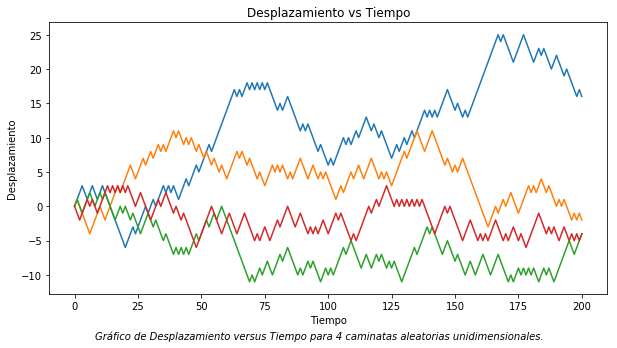

In [16]:
caption = "Gráfico de Desplazamiento versus Tiempo para 4 caminatas aleatorias unidimensionales."    
fig = plt.figure(figsize=(10,5)) 
fig.text(.5,.001, caption, ha="center",style="oblique")
plt.title("Desplazamiento vs Tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Desplazamiento")
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.show()


Se puede observar que, los movimientos tomados en los cuatro caminos siguen una distribución normal, todos terminan con un desplazamiento distinto una vez pasados los 200 movimientos. También se puede ver que todos los caminos vuelven a pasar por el origen.

Luego, se desea estudiar caminos aleatorios bidimensionales y tridimensionales, principalmente la probabilidad de volver al punto inicial dada una cierta cantidad de pasos.

Para simular estas caminatas se utilizará una función que elegirá entre -1 y 1 de manera uniforme. 

In [17]:
def choice():
    return np.random.choice([1,-1])

Utilizando la función anterior, se decidirá la trayectoria en los casos bidimensionales y tridimensionales. En el caso bidimensional se realizará de la siguiente manera.

- Se utilizará dos veces la función Choice.
    - Con esto se obtendrá un vector de movimiento, el cual podrá ser una de las cuatro diagonales, cada una equiprobables de ser elegidas.


In [18]:

def pasoBidimensional(posicionActual):
    a = choice()
    b = choice()
    posicionActual[0] += a
    posicionActual[1] += b
            

Utilizando lo anterior se simulan 10000 caminatas aleatorias, cada una con 500 pasos máximos, donde el caminante partirá desde el punto (0, 0). Los resultados se almacenan en la lista _**"volvio"**_, guardando un 1 si el caminante logró volver al origen y 0 si no. Además se almacenan la cantidad de pasos necesarios en la lista _**"pasos2D"**_.

Luego, se calcula la probabilidad de que el caminante vuelva al origen en un paseo de 500 pasos máximos utilizando la definición de probabilidad empírica.

In [19]:
volvio = []
pasos2D = []
for j in range(10000):
    posicion = [0,0]
    flagVolvio = False
    for i in range(500):  
        pasoBidimensional(posicion)
        if posicion[0] == 0 and posicion[1] == 0:
            volvio.append(1)
            pasos2D.append(i + 1)
            flagVolvio = True
            break
    if flagVolvio == False:
        volvio.append(0)
        pasos2D.append(500)

print("La probabilidad de volver al origen es de: "+str(np.sum(volvio)/len(volvio))) 

La probabilidad de volver al origen es de: 0.657


Una vez realizadas las simulaciones con un tope máximo de 500, la probabilidad de volver al origen es de 0.657.

Para el caso tridimensional se sigue el mismo razonamiento utilizado para el caso bidimensional, pero en este caso de utilizará 3 veces la función _**choice**_. En este caso se obtendrá un vector movimiento que definirá el movimiento por una de las ocho "diagonales" presentes en un modelo 3D.

In [ ]:
def pasoTridimensional(posicionActual):
    a = choice()
    b = choice()
    c = choice()
    posicionActual[0] += a
    posicionActual[1] += b
    posicionActual[2] += c

En este caso también se hacen 10000 simulaciones con un tope de pasos de 500. La manera de almacenar los resultados es la misma que en el caso bidimiensional, en este caso los resultados se guardarán en los arreglos _**volvio3D**_ y _**pasos3D**_.

In [ ]:
volvio3D = []
pasos3D = []
for j in range(10000):
    posicion = [0,0,0]
    flagVolvio = False
    for i in range(500):  
        pasoTridimensional(posicion)
        if posicion[0] == 0 and posicion[1] == 0 and posicion[2] == 0:
            volvio3D.append(1)
            pasos3D.append(i + 1)
            flagVolvio = True
            break
    if flagVolvio == False:
        volvio3D.append(0)
        pasos3D.append(500)
        
print("La probabilidad de volver al origen es de: "+str(np.sum(volvio3D)/len(volvio3D)))        

Al calcular la probabilidad de volver al origen en una caminata tridimensional se obtiene que es 0.2754, lo que es menor al valor obtenido al calcular el caso bidimensional. Esto indica que la afirmación "es más probable que un humano borracho llegue a su casa que un pájaro borracho llegue a su nido", bajo esta configuración de parámetros, es cierta.

Por último, Pòlya (1921)[2] demostró que la probabilidad de volver al origen en una caminata aleatoria unidimensional y bidimensional es 1, por lo que es de esperar que a medida que se aumenta la cantidad de pasos la probabilidad de volver al origen en el caso bidimensional aumente. Por otro lado Montroll (1956)[3] demostró que la probabilidad de volver al origen en el caso tridimensional es aproximadamente $0.340537$, por lo que al aumentar la cantidad de pasos máximos se debería converger a dicho valor.

## Referencias

- [1] Devore, J. L. (2008). Probabilidad y estadística para ingenierías y ciencias. (pp 234) Cengage Learning Editores.
- [2] Pólya, G.. "Über eine Aufgabe der Wahrscheinlichkeitsrechnung betreffend die Irrfahrt im Straßennetz." Mathematische Annalen 84 (1921): 149-160. 
- [3] Montroll, E. W. "Random Walks in Multidimensional Spaces, Especially on Periodic Lattices." J. SIAM 4, 241-260, (1956). 